<a href="https://colab.research.google.com/github/ishita164/DataAnalytics/blob/main/Exp4/DA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score


data = pd.read_csv('climate_change.csv')
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


308

In [ ]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
data.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [ ]:
data.shape

(308, 11)

In [ ]:
data.isnull()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
303,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
#any: if any NA values are present, drop that label
data.dropna(how = 'any').shape

(308, 11)

In [ ]:
#all: if all values ate NA, drop that label
data.dropna(how = 'all').shape

(308, 11)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [ ]:
data = data.drop('Month', axis=1)
data = data.sort_values('Year')

In [ ]:
data = data.drop(columns=['N2O'], axis=1)

In [ ]:
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [ ]:
data.to_csv("/content/modified_climate_change.csv")


Not considering Year, month and  N2O (Since N2O and CO2 has similar distribution)

Using SAS software which readily provided the statistical data.

1) Using forward elimination methodology,enter the variable havinf low coorelation value i.e. CO2. R2 value as 0.5822. Here, F0.95(1, 232) = 3.88 which is far lesser that obtained F-value of 323.28. Here, for the variable CO2, p-value is less than α value of 0.05. Hence, we reject the individual hypothesis.

2) Next variable CH4. R2 value as 0.5937. Here, F0.95(2, 231) = 3.03 which is far lesser that obtained F-value of 168.77. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis.

3) Next variable CFC_12. R2 value as 0.6097. Here, F0.95(3, 289) = 2.64 which is far lesser that obtained F-value of 119.77. Here, for the variable CH4, p-value is more than α value of 0.05. Hence, we accept the individual hypothesis. Dropping CH4

4) Next variable Aerosols. On entering the Aerosols column which had correlation value of -0.46, I got R2 value as 0.6184. Here, F0.95(3, 289) = 2.64 which is far lesser that obtained F-value of 124.23. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis

5) Next variable CFC_11. On entering the CFC_11 column which had correlation value of 0.41, I got R2 value as 0.6334. Here, F0.95(4, 229) = 2.41 which is far lesser that obtained F-value of 98.9. Here, for the variable CO2, p-value is more than α value of 0.05. Hence, we accept the individual hypothesis. Dropping CO2

6) Next variable MEI. On entering the MEI column which had correlation value of 0.18, I got R2 value as 0.7072. Here, F0.95(4, 229) = 2.41 which is far lesser that obtained F-value of 138.26. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis

7) Next variable TSI. On entering the TSI column which had correlation value of 0.18, I got R2 value as 0.7343. Here, F0.95(5, 287) = 2.25 which is far lesser that obtained F-value of 126.05. ere, for all the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis.

In [ ]:
corelation = data.corr()

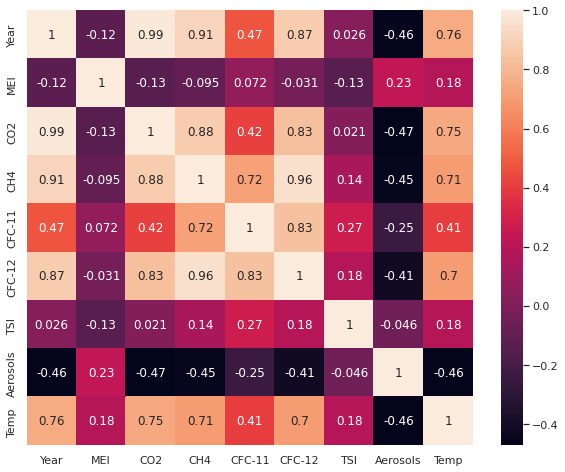

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

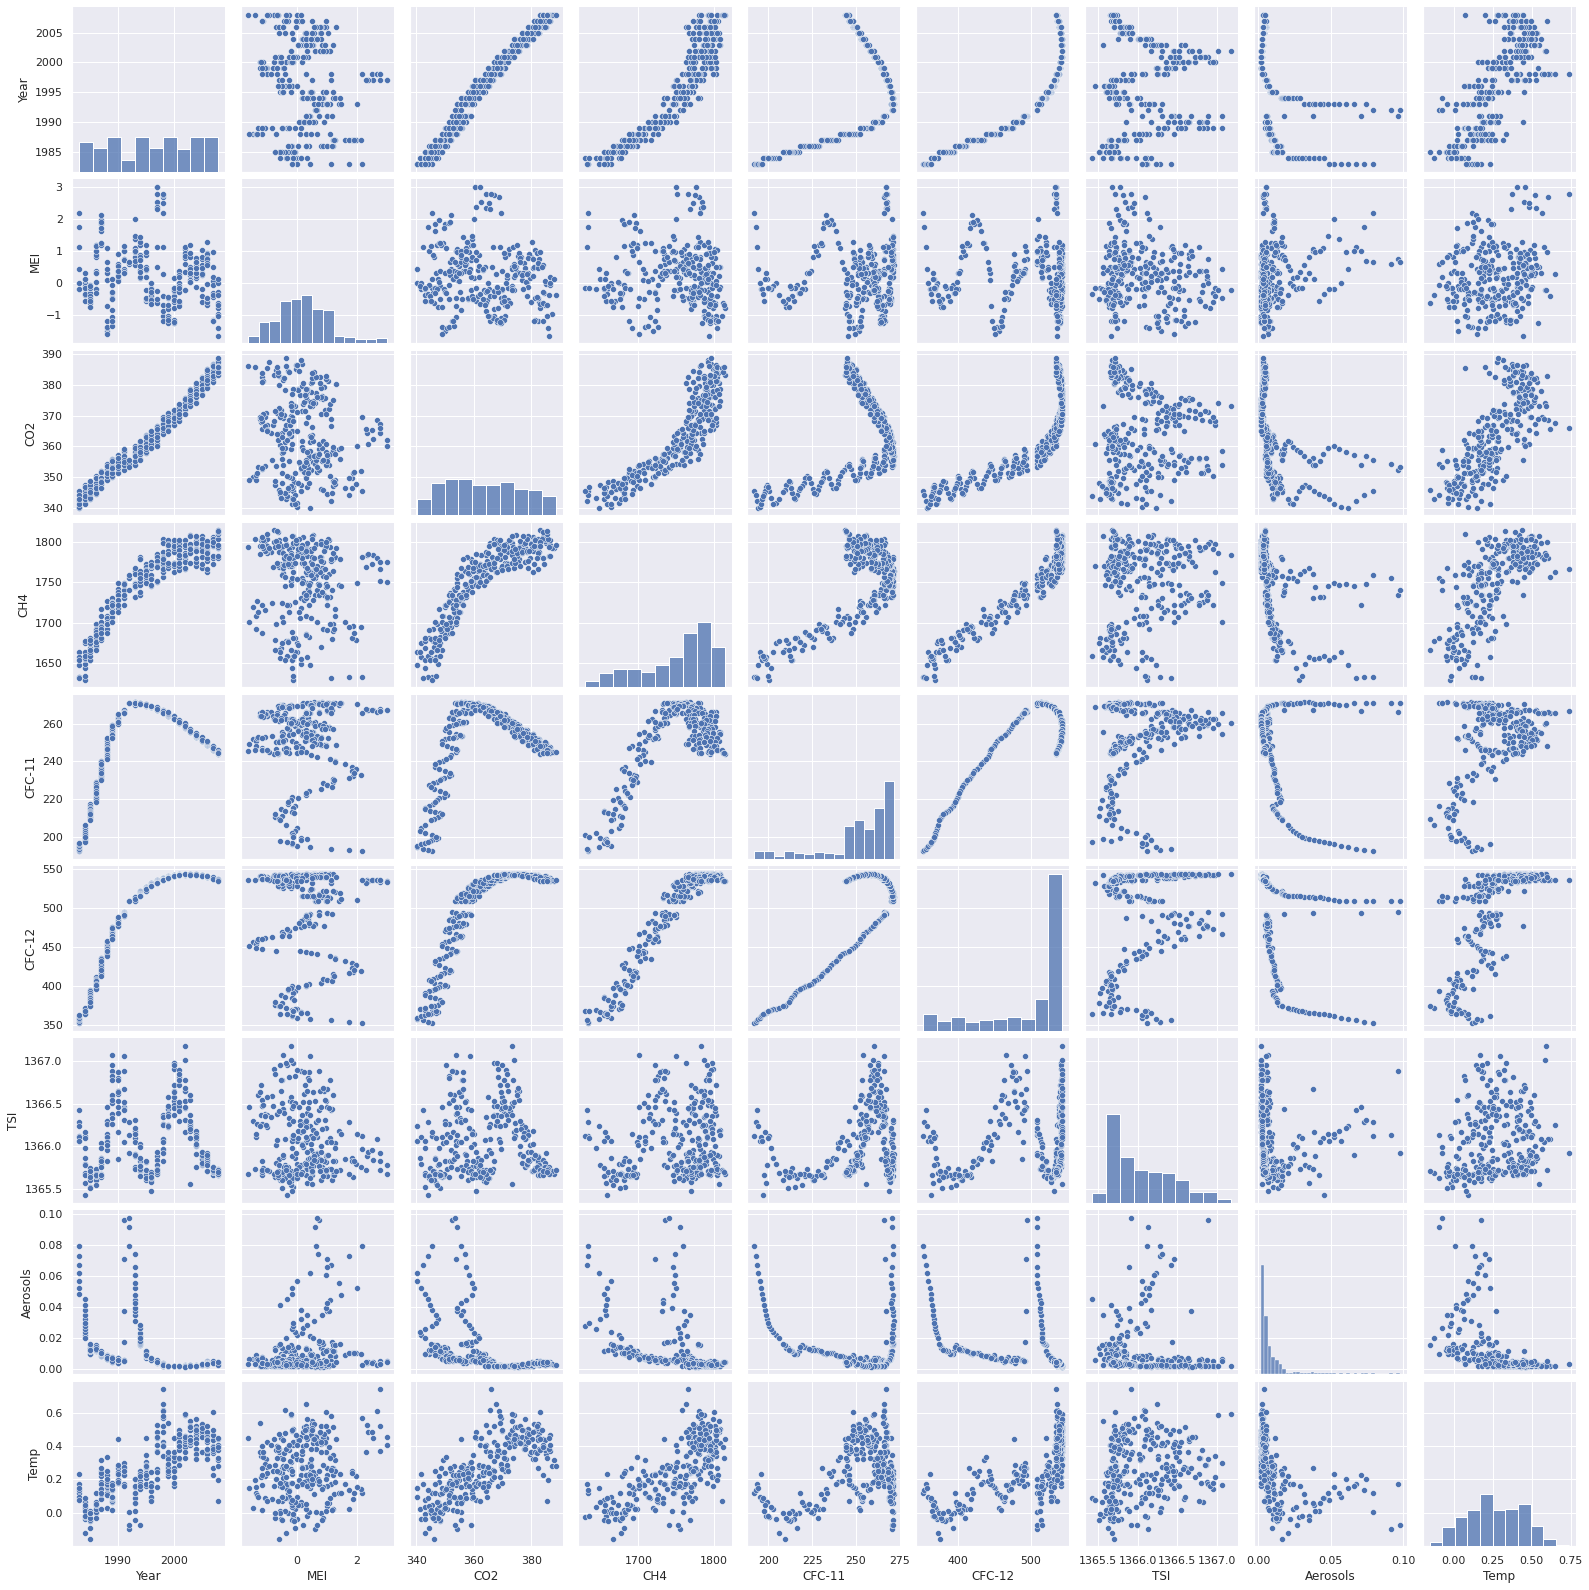

In [ ]:
sns.pairplot(data)

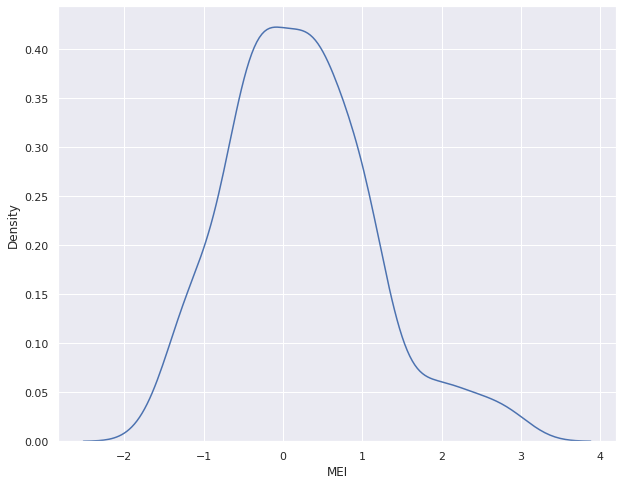

In [ ]:
sns.kdeplot(data.MEI)

In [ ]:
len(data)

293

In [ ]:
# upto_2006
training_set = data[data["Year"] < 2007]
len(training_set)

269

In [ ]:
training_set.head()

,Year,MEI,CO2,CH4,CFC-11,CFC-12,TSI,Aerosols,Temp
1,1983,2.167,345.52,1633.71,192.057,351.848,1366.1208,0.0794,0.118
2,1983,1.741,344.15,1633.22,192.818,353.725,1366.2850,0.0731,0.137
3,1983,1.130,342.25,1631.35,193.602,355.633,1366.4202,0.0673,0.176
4,1983,0.428,340.17,1648.40,194.392,357.465,1366.2335,0.0619,0.149
5,1983,0.002,340.30,1663.79,195.171,359.174,1366.0589,0.0569,0.093


In [ ]:
# after_2006
testing_set = data[data["Year"] > 2006]
len(testing_set)

24

In [ ]:
corrr=training_set.corr()

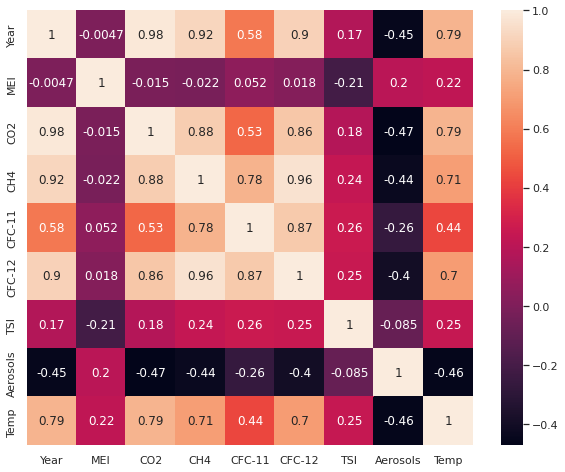

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corrr, xticklabels=corrr.columns, yticklabels=corrr.columns,annot=True)

In [ ]:
variables = ['CFC-12', 'Aerosols', 'CFC-11', 'MEI', 'TSI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[variables], data['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)


In [ ]:
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)


Co-efficient:  [ 0.00355657 -2.26505733 -0.00600911  0.06157488  0.07658244]
Intercept:  -104.600041015014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  74.55475436593422


Q. Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05. (Select all that apply.)

a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosols



ANS:

Using SAS tool, we get 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05.

Q. Which of the following is the simplest correct explanation for this contradiction?

Exercise 3

I. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.

II. There is not enough data, so the regression coefficients being estimated are not accurate.

III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.



ANS:

All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. 

The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7)
The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)

In [ ]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [ ]:
variables = ['CFC-12', 'Aerosols', 'CFC-11', 'MEI', 'TSI']